In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de SP 

In [2]:
gdf = gpd.read_file('Shapes/SP/35SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 14 columns):
ID            68296 non-null int64
CD_GEOCODI    68296 non-null object
TIPO          68296 non-null object
CD_GEOCODB    18797 non-null object
NM_BAIRRO     18797 non-null object
CD_GEOCODS    68296 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    68296 non-null object
NM_DISTRIT    68296 non-null object
CD_GEOCODM    68296 non-null object
NM_MUNICIP    68296 non-null object
NM_MICRO      68296 non-null object
NM_MESO       68296 non-null object
geometry      68296 non-null object
dtypes: int64(1), object(13)
memory usage: 7.3+ MB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para SP - Exceto a Capital

In [5]:
dados = pd.read_csv('Planilhas/SP/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Basico_SP2.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(47733, 13)

# Importando os resultados do universo  para SP - Capital

In [7]:
dados_cap =pd.read_csv('Planilhas/SP/SP_Capital/CSV/Basico_SP1.csv',sep =';')
dados_cap.rename(columns={'Cod_setor':'CD_GEOCODI'},inplace = True)

dados_cap.shape

(18363, 13)

In [8]:
sp_data= dados.append(dados_cap,sort = True)

# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [9]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [10]:
sp = pd.merge(gdf,sp_data, on='CD_GEOCODI')

In [11]:
sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 66096 entries, 0 to 66095
Data columns (total 26 columns):
ID            66096 non-null int64
CD_GEOCODI    66096 non-null int64
TIPO          66096 non-null object
CD_GEOCODB    18203 non-null object
NM_BAIRRO     18203 non-null object
CD_GEOCODS    66096 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    66096 non-null object
NM_DISTRIT    66096 non-null object
CD_GEOCODM    66096 non-null object
NM_MUNICIP    66096 non-null object
NM_MICRO      66096 non-null object
NM_MESO       66096 non-null object
geometry      66096 non-null object
V001          65812 non-null float64
V002          65812 non-null float64
V003          65812 non-null object
V004          65812 non-null object
V005          65812 non-null object
V006          65812 non-null object
V007          65767 non-null object
V008          65767 non-null object
V009          66095 non-null object
V010          66095 non-null object
V011          66007 non

In [12]:
del gdf
del dados
del dados_cap
del sp_data

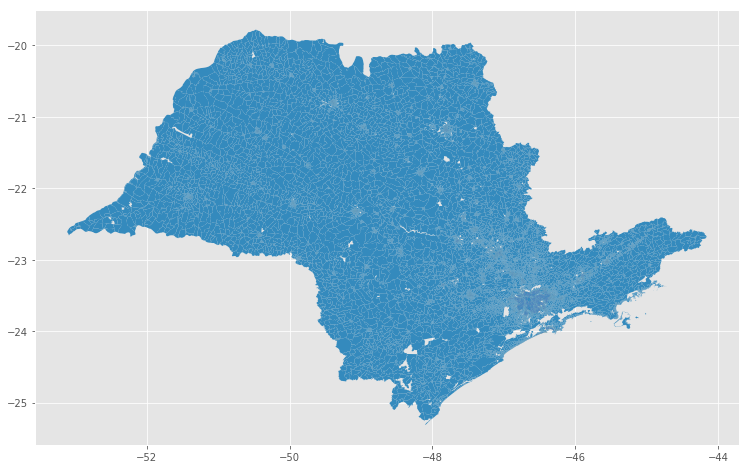

In [60]:
plt.style.use('ggplot')
sp.plot(figsize = (17,8))

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
sp['AREA'] = sp.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_br_15['Area'].sum()

54150.18853139476

A área total urbana retratada no artigo é 54077Km², No sistema SIGAS 2000, no entanto exstem várias epsg nesse sitema

In [17]:
print('Erro:', (54150.18853139476 - 54077)/54077)

Erro: 0.0013534133068542425


In [18]:
areas_urbanas_sp_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='SP']
del areas_urbanas_br_15

In [19]:
areas_urbanas_sp_15.head()

Municipio  UF  Area_Urb  Geocodigo  \
61         ColÃ´mbia  SP     1.739  3512100.0   
75   JÃºlio Mesquita  SP     1.240  3525805.0   
189       AnalÃ¢ndia  SP     3.701  3502002.0   
222       Adamantina  SP    11.768  3500105.0   
223           Adolfo  SP     1.665  3500204.0   

                                              geometry       Area  
61   POLYGON ((-48.69298010799476 -20.1706002034428...   1.739424  
75   POLYGON ((-49.79575647272307 -22.0126616305428...   1.239820  
189  POLYGON ((-47.66948354482395 -22.1203152118100...   3.700765  
222  (POLYGON ((-51.04703541186456 -21.696835417223...  11.767917  
223  POLYGON ((-49.6401192672517 -21.23915552587971...   1.664944

In [20]:
areas_urbanas_sp_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_sp_15['CD_GEOCODM']=areas_urbanas_sp_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_sp_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 645 entries, 61 to 882
Data columns (total 6 columns):
Municipio     645 non-null object
UF            645 non-null object
Area_Urb      645 non-null float64
CD_GEOCODM    645 non-null int64
geometry      645 non-null object
Area          645 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 35.3+ KB


In [21]:
areas_urbanas_sp_15.Municipio = areas_urbanas_sp_15.Municipio.str.upper()

In [22]:
sp.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

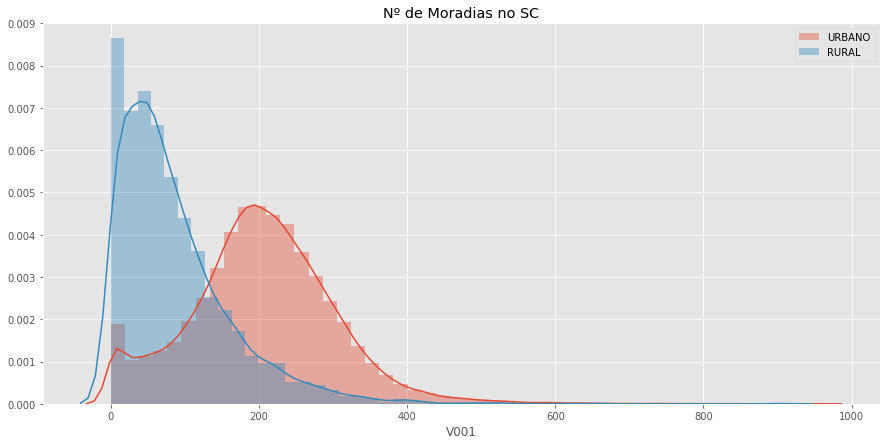

In [23]:
plt.style.use('ggplot')
sp['V001'] = pd.to_numeric(sp['V001'])
sp['V002'] = pd.to_numeric(sp['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(sp[sp['TIPO']=='URBANO']['V001'])
sns.distplot(sp[sp['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.009))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [116]:
print('RURAL','\n',sp[sp['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',sp[sp['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    5564.000000
mean       86.821531
std        76.112776
min         1.000000
25%        33.000000
50%        67.000000
75%       119.000000
max       906.000000
Name: V001, dtype: float64
URBANO 
 count    60248.000000
mean       204.887764
std         97.353420
min          1.000000
25%        146.000000
50%        203.000000
75%        263.000000
max        954.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Area no SC- Rural e URBANO Embrapa')

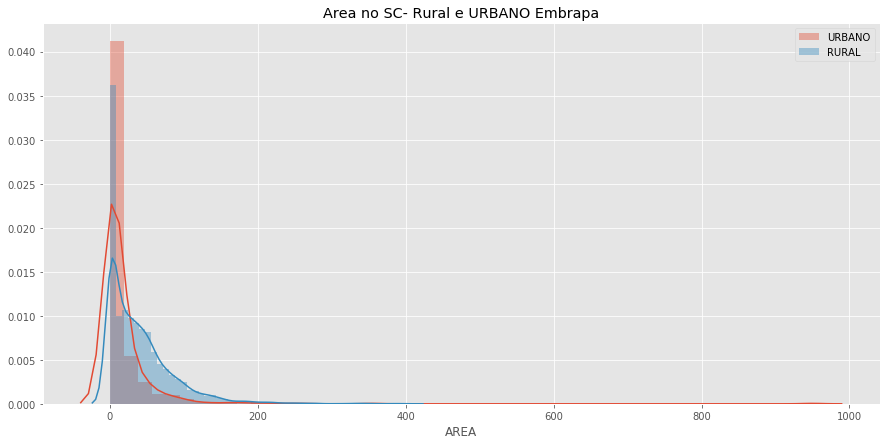

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_sp_15['Area'])
plt.legend(['URBANO'])
sns.distplot(sp[sp['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')

## Descrição da área por setor censitários urbanos e rurais

In [141]:
print('URBANO','\n',areas_urbanas_sp_15['AREA'].describe())
print('RURAL','\n',sp[sp['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    645.000000
mean      17.290250
std       48.401951
min        0.282533
25%        1.559160
50%        4.402828
75%       14.687253
max      949.617839
Name: AREA, dtype: float64
RURAL 
 count    5614.000000
mean       40.142932
std        44.737269
min         0.000447
25%         5.105599
50%        28.739870
75%        57.704127
max       399.364458
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0027)

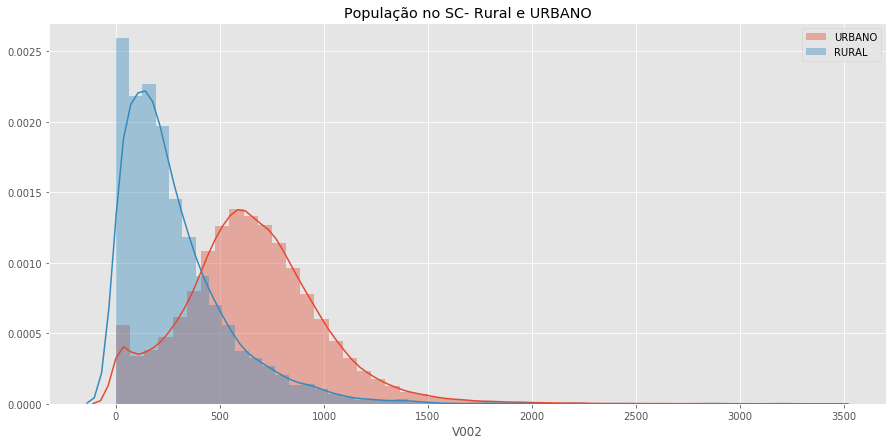

In [32]:
fig = plt.figure(figsize = (15,7))

sns.distplot(sp[sp['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(sp[sp['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.0027))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [33]:
print('RURAL','\n',sp[sp['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',sp[sp['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    5614.000000
mean      284.033131
std       260.708443
min         0.000000
25%       103.000000
50%       216.000000
75%       388.750000
max      3192.000000
Name: V002, dtype: float64
URBANO 
 count    60482.000000
mean       651.604742
std        333.421339
min          0.000000
25%        442.000000
50%        635.000000
75%        841.000000
max       3408.000000
Name: V002, dtype: float64


In [24]:
sp['Densidade Moradias'] = sp.V001/sp.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

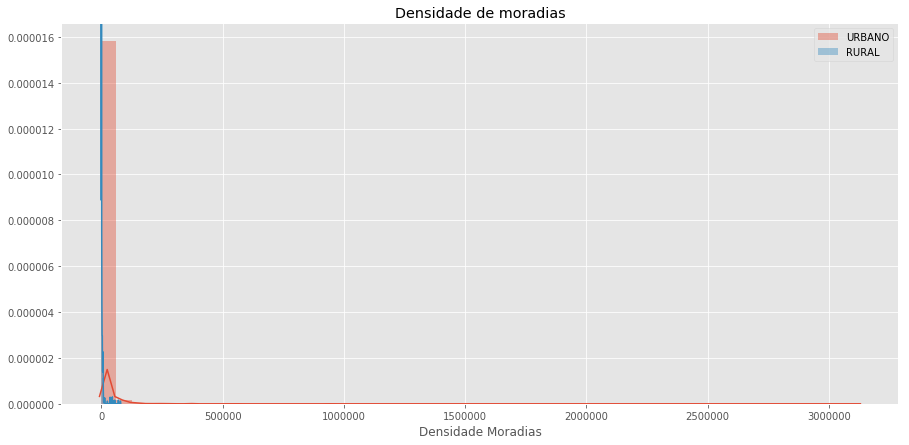

In [25]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(sp[sp['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(sp[sp['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [26]:
print('RURAL','\n',sp[sp['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',sp[sp['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     5614.000000
mean       240.777944
std       2445.299189
min          0.000000
25%          0.958947
50%          2.399279
75%         10.192426
max      79193.317435
Name: Densidade Moradias, dtype: float64
URBANO 
 count    6.048200e+04
mean     6.002925e+03
std      2.158361e+04
min      0.000000e+00
25%      1.143062e+03
50%      2.681069e+03
75%      5.239493e+03
max      3.122972e+06
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários RURAIS

In [28]:
max_area = areas_urbanas_sp_15['Area'].mean()
min_pop =  sp[sp['TIPO']=='URBANO']['V002'].mean() + sp[sp['TIPO']=='URBANO']['V002'].std()
min_mor =  sp[sp['TIPO']=='URBANO']['V001'].mean() + sp[sp['TIPO']=='URBANO']['V001'].std()
min_densidade_moradias = sp[sp['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [29]:
scrcu = sp[(sp.TIPO=='RURAL')&(sp.V001 >= min_mor)&(sp.AREA <= max_area)&(sp.V002>= min_pop)&(sp['Densidade Moradias']>= min_densidade_moradias)]

In [30]:
scrcu.describe()

ID    CD_GEOCODI        V001         V002       AREA  \
count      17.000000  1.700000e+01   17.000000    17.000000  17.000000   
mean   104827.647059  3.540106e+14  405.411765  1424.470588   0.172598   
std     19094.965554  1.697408e+12  151.925170   541.035133   0.126361   
min     66447.000000  3.501905e+14  304.000000  1038.000000   0.007287   
25%     92387.000000  3.530607e+14  320.000000  1162.000000   0.095418   
50%    110130.000000  3.550308e+14  362.000000  1232.000000   0.160869   
75%    117885.000000  3.550308e+14  396.000000  1401.000000   0.199442   
max    133704.000000  3.557006e+14  906.000000  3192.000000   0.500746   

       Densidade Moradias  
count           17.000000  
mean          5339.061162  
std           9633.132723  
min           1509.064858  
25%           1793.982157  
50%           2162.738376  
75%           3867.188062  
max          41991.519693

Text(0.5,1,'SCRCU - Por Município')

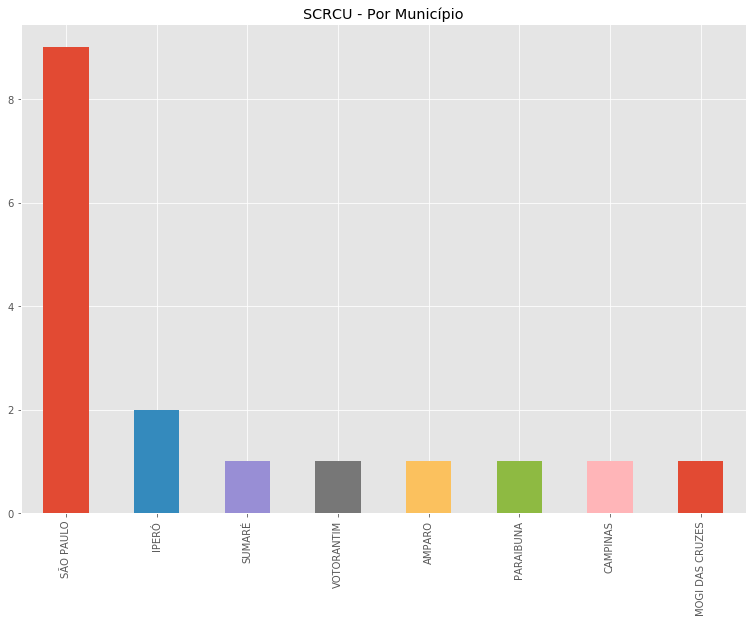

In [31]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de SP - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


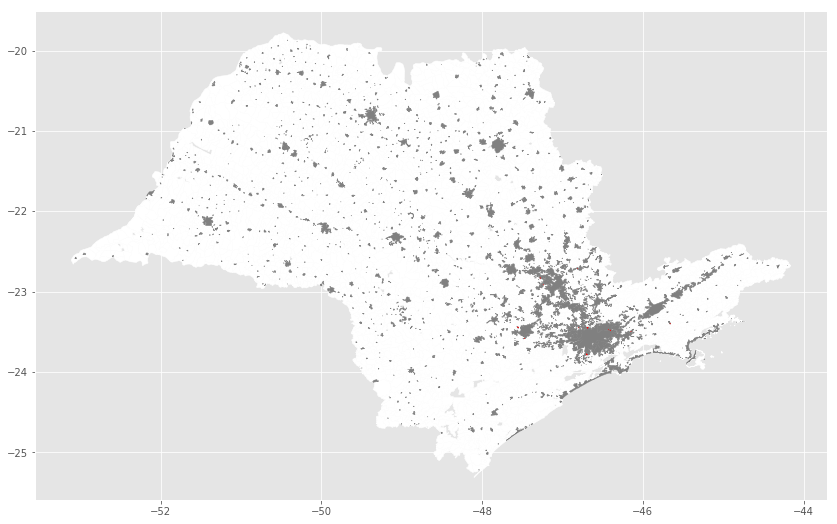

In [32]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
sp.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_sp_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [33]:
scrcu.columns

Index(['ID', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODS',
       'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MICRO', 'NM_MESO', 'geometry', 'V001', 'V002', 'V003', 'V004',
       'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012', 'AREA',
       'Densidade Moradias'],
      dtype='object')

In [34]:
areas_urbanas_sp_15.columns

Index(['Municipio', 'UF', 'Area_Urb', 'CD_GEOCODM', 'geometry', 'Area'], dtype='object')

In [35]:
areas_urbanas_sp_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_sp_15.shape[0])
areas_urbanas_sp_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_sp = scrcu[['geometry','FONTE']].append(areas_urbanas_sp_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_sp.head()

geometry  FONTE
829    POLYGON ((-46.81174499999999 -22.713115, -46.8...    1.0
8055   POLYGON ((-47.2374365608925 -22.9127932671921,...    1.0
17706  POLYGON ((-47.55304388653349 -23.4399852484767...    1.0
17707  POLYGON ((-47.5548133679999 -23.4431859459999,...    1.0
25937  POLYGON ((-46.150639 -23.49515, -46.150425 -23...    1.0

In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_sp['FONTE'] = regioes_urbanas_sp['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_sp.head()

geometry FONTE
829    POLYGON ((-46.81174499999999 -22.713115, -46.8...  ALAN
8055   POLYGON ((-47.2374365608925 -22.9127932671921,...  ALAN
17706  POLYGON ((-47.55304388653349 -23.4399852484767...  ALAN
17707  POLYGON ((-47.5548133679999 -23.4431859459999,...  ALAN
25937  POLYGON ((-46.150639 -23.49515, -46.150425 -23...  ALAN

In [42]:
regioes_urbanas_sp.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_sp.shp')

In [43]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_sp[regioes_urbanas_sp['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_sp[regioes_urbanas_sp['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_sp.crs)